In [26]:
# pip install charmap

In [27]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
def save_json_without_escape(filepath, dataframe):
    with open(filepath, 'w', encoding="utf-8") as f:
        json.dump(dataframe.to_dict(orient='records'), f, ensure_ascii=False, indent=4)
        
# Load your dataset
with open('set/haveMD_302.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:

df = pd.DataFrame(data)

selected_features = ['num_commits', 'project_age_days', 'num_contributors', 
                     'num_issues', 'num_pull', 'project_size(kB)', 
                     'num_stargazers', 'num_watchers', 'num_subscribers']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Normalize selected features
df[selected_features] = scaler.fit_transform(df[selected_features])


# Categories of interest
categories_of_interest = {"Generic policy", "Reporting mechanism", "Scope of practice", "User guideline"}

splits = {}
for category in categories_of_interest:
    df[f'has_{category.replace(" ", "_").lower()}'] = df['SecurityPolicy_content_category'].apply(
        lambda x: category in x if isinstance(x, list) else False
    )
    
    X = df.drop(f'has_{category.replace(" ", "_").lower()}', axis=1)
    y = df[f'has_{category.replace(" ", "_").lower()}']
    
    # Stratified train-test split 70-30
    train_df, temp_df = train_test_split(df, test_size=0.3, stratify=y, random_state=42)
    
    # Split temp_df into validation and test sets 20-10
    validation_df, test_df = train_test_split(temp_df, test_size=(1/3), stratify=temp_df[f'has_{category.replace(" ", "_").lower()}'], random_state=42)
    
    splits[category] = {"train": train_df, "val": validation_df, "test": test_df}
    
    # Print the counts and distributions for verification
    print(f"Category: {category}\n")
    print("Train dataset:")
    print(train_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print()
    
    print("Validation dataset:")
    print(validation_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print()
    
    print("Test dataset:")
    print(test_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print("-" * 40)

# Save processed data
for category, datasets in splits.items():
    for split_name, dataset in datasets.items():
        save_json_without_escape(f"dataset/{category.replace(' ', '_')}_{split_name}.json", dataset)

print("Data preprocessing complete. JSON files saved.")


Category: Reporting mechanism

Train dataset:
has_reporting_mechanism
True     0.881517
False    0.118483
Name: proportion, dtype: float64

Validation dataset:
has_reporting_mechanism
True     0.883333
False    0.116667
Name: proportion, dtype: float64

Test dataset:
has_reporting_mechanism
True     0.870968
False    0.129032
Name: proportion, dtype: float64
----------------------------------------
Category: Scope of practice

Train dataset:
has_scope_of_practice
False    0.587678
True     0.412322
Name: proportion, dtype: float64

Validation dataset:
has_scope_of_practice
False    0.583333
True     0.416667
Name: proportion, dtype: float64

Test dataset:
has_scope_of_practice
False    0.580645
True     0.419355
Name: proportion, dtype: float64
----------------------------------------
Category: Generic policy

Train dataset:
has_generic_policy
True     0.687204
False    0.312796
Name: proportion, dtype: float64

Validation dataset:
has_generic_policy
True     0.683333
False    0.316667

In [30]:
from collections import Counter

def read_json(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return pd.DataFrame(json.load(f))

categories_of_interest = {"Generic policy", "Reporting mechanism", "Scope of practice", "User guideline"}

# Binary encoding for each category
for category in categories_of_interest:
    train_df = read_json(f'dataset/{category.replace(' ', '_')}_train.json')
    validation_df = read_json(f'dataset/{category.replace(' ', '_')}_val.json')
    test_df = read_json(f'dataset/{category.replace(' ', '_')}_test.json')

datasets = {"Train": train_df, "Validation": validation_df, "Test": test_df}

# Process each set
for dataset_name, dataset in datasets.items():
    # Total number of packages
    total_packages = len(dataset)
    print(f"\n{dataset_name} Dataset: Total Packages = {total_packages}")
    
    # Count packages for each category
    category_counts = Counter(
        category for categories in dataset['SecurityPolicy_content_category'] for category in categories
    )
    print(f"Category Counts in {dataset_name} Dataset:")
    for category, count in category_counts.items():

        print(f"{category}: {count}")
    


Train Dataset: Total Packages = 211
Category Counts in Train Dataset:
Generic policy: 145
Scope of practice: 93
Reporting mechanism: 202
User guideline: 87
Projects practice: 16
History of vulnerability: 8
Information on maintainer: 4
Additional information: 4

Validation Dataset: Total Packages = 60
Category Counts in Validation Dataset:
Generic policy: 44
Scope of practice: 22
Reporting mechanism: 57
Additional information: 2
User guideline: 21
Projects practice: 3

Test Dataset: Total Packages = 31
Category Counts in Test Dataset:
Generic policy: 21
User guideline: 5
Reporting mechanism: 23
Scope of practice: 11
Projects practice: 1
Additional information: 1


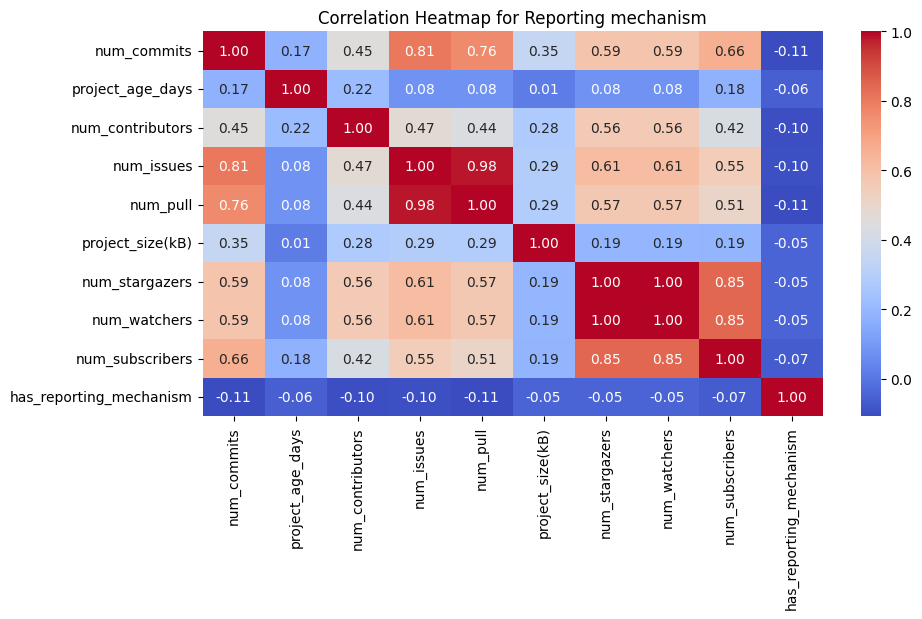

Top Features for Reporting mechanism:

Pearson Correlation:
 project_size(kB)   -0.045327
num_stargazers     -0.046954
num_watchers       -0.046954
project_age_days   -0.060317
num_subscribers    -0.066545
Name: has_reporting_mechanism, dtype: float64 

Mutual Information:
 num_contributors    0.026169
project_age_days    0.012282
num_issues          0.006563
num_commits         0.000000
num_pull            0.000000
dtype: float64 

Feature Importance:
 num_contributors    0.134299
project_age_days    0.117942
project_size(kB)    0.117443
num_subscribers     0.110644
num_issues          0.110299
dtype: float64 

--------------------------------------------------


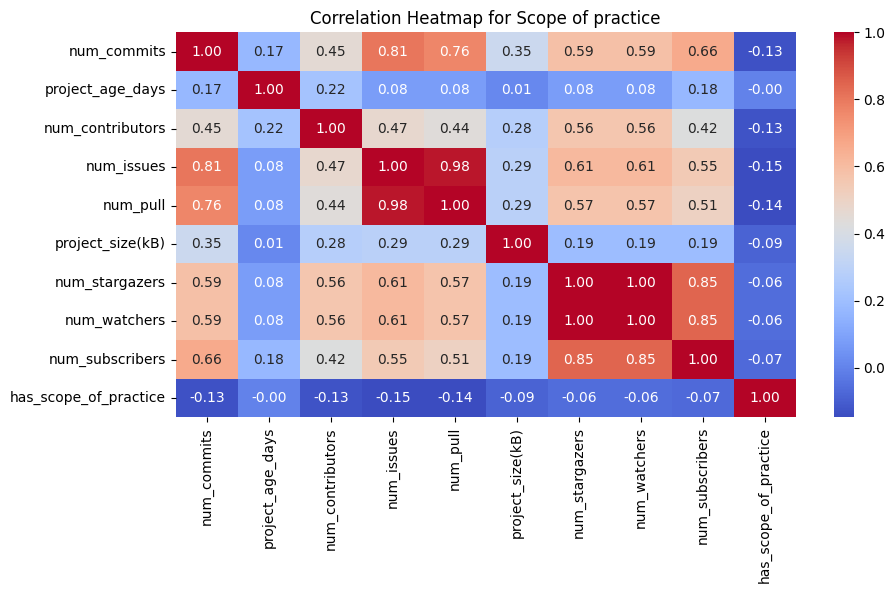

Top Features for Scope of practice:

Pearson Correlation:
 project_age_days   -0.001225
num_stargazers     -0.057853
num_watchers       -0.057853
num_subscribers    -0.070864
project_size(kB)   -0.089157
Name: has_scope_of_practice, dtype: float64 

Mutual Information:
 num_pull            0.047623
project_age_days    0.046576
num_stargazers      0.036136
num_watchers        0.033137
num_issues          0.023538
dtype: float64 

Feature Importance:
 project_age_days    0.145931
num_contributors    0.131950
num_subscribers     0.110303
num_issues          0.110168
project_size(kB)    0.109897
dtype: float64 

--------------------------------------------------


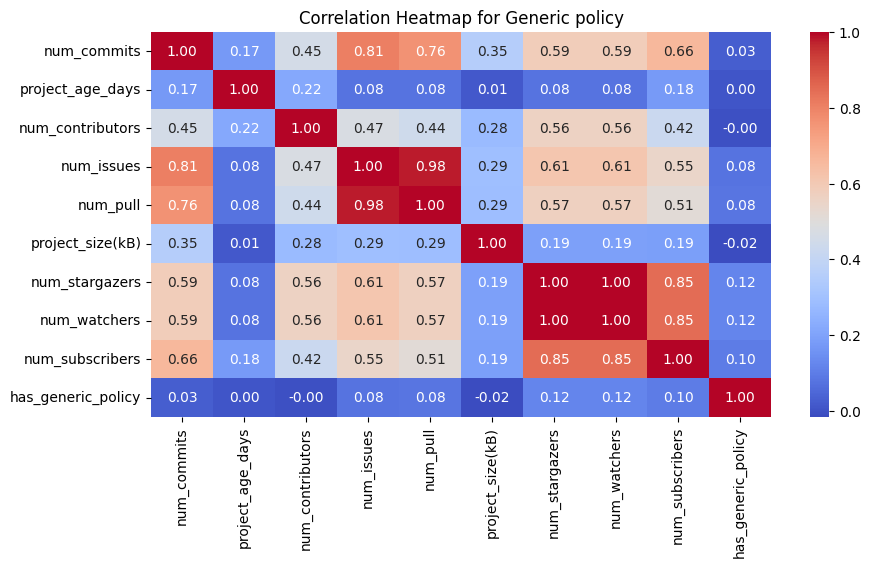

Top Features for Generic policy:

Pearson Correlation:
 num_stargazers     0.123033
num_watchers       0.123033
num_subscribers    0.096677
num_pull           0.082346
num_issues         0.076771
Name: has_generic_policy, dtype: float64 

Mutual Information:
 project_age_days    0.065161
num_contributors    0.018586
num_subscribers     0.005426
num_pull            0.003457
num_commits         0.000000
dtype: float64 

Feature Importance:
 project_age_days    0.152135
num_contributors    0.124041
num_subscribers     0.116407
num_issues          0.108271
num_commits         0.107792
dtype: float64 

--------------------------------------------------


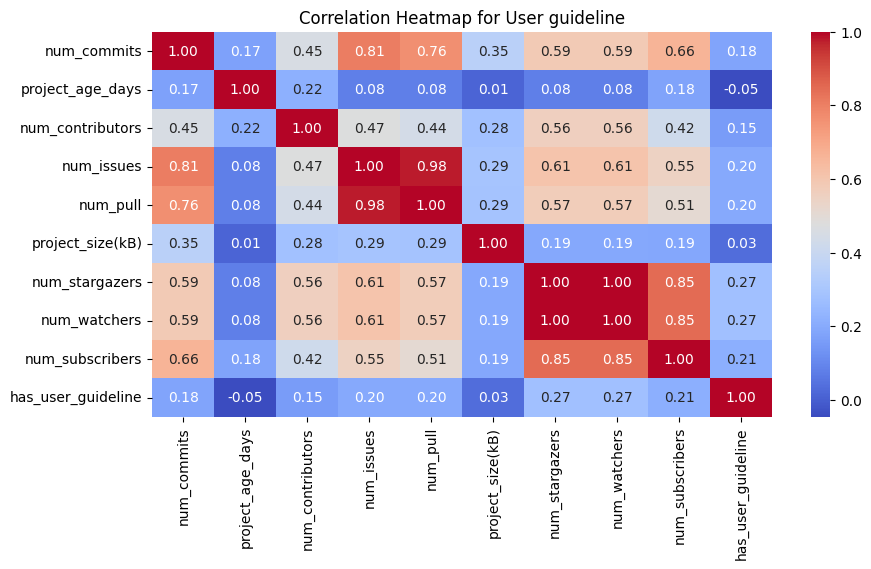

Top Features for User guideline:

Pearson Correlation:
 num_stargazers     0.274653
num_watchers       0.274653
num_subscribers    0.212509
num_issues         0.198366
num_pull           0.196265
Name: has_user_guideline, dtype: float64 

Mutual Information:
 num_issues          0.049861
num_commits         0.042591
num_pull            0.032794
project_age_days    0.022269
num_subscribers     0.011623
dtype: float64 

Feature Importance:
 num_issues          0.139459
project_age_days    0.135525
num_watchers        0.118625
project_size(kB)    0.117366
num_pull            0.114902
dtype: float64 

--------------------------------------------------
Feature selection analysis complete.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Normalize selected features
selected_features = ['num_commits', 'project_age_days', 'num_contributors', 
                     'num_issues', 'num_pull', 'project_size(kB)', 
                     'num_stargazers', 'num_watchers', 'num_subscribers']

scaler = MinMaxScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Categories of interest
categories_of_interest = {"Generic policy", "Reporting mechanism", "Scope of practice", "User guideline"}

correlation_results = {}

for category in categories_of_interest:
    target_col = f'has_{category.replace(" ", "_").lower()}'
    
    # Convert category label to binary
    df[target_col] = df['SecurityPolicy_content_category'].apply(
        lambda x: category in x if isinstance(x, list) else False
    )

    # 1. **Pearson Correlation**
    corr_values = df[selected_features + [target_col]].corr()[target_col].drop(target_col).sort_values(ascending=False)

    # 2. **Mutual Information**
    mi_values = mutual_info_classif(df[selected_features], df[target_col], discrete_features=False)
    mi_scores = pd.Series(mi_values, index=selected_features).sort_values(ascending=False)

    # 3. **Feature Importance (Random Forest)**
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(df[selected_features], df[target_col])
    feature_importance = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)

    # Store results
    correlation_results[category] = {
        "Pearson Correlation": corr_values,
        "Mutual Information": mi_scores,
        "Feature Importance": feature_importance
    }

    # Display results as a heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(df[selected_features + [target_col]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {category}")
    plt.show()

    # Print top correlated features
    print(f"Top Features for {category}:\n")
    print("Pearson Correlation:\n", corr_values.head(5), "\n")
    print("Mutual Information:\n", mi_scores.head(5), "\n")
    print("Feature Importance:\n", feature_importance.head(5), "\n")
    print("-" * 50)

print("Feature selection analysis complete.")